## Question 1



In [9]:
import scipy.io
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

data = scipy.io.loadmat('power.mat')
power = data['Power'].T  

successful = power[:, 0]
unsuccessful = power[:, 1]

differences = successful - unsuccessful

shapiro_stat, shapiro_p = stats.shapiro(differences)
print(f"Shapiro-Wilk test: W = {shapiro_stat:.4f}, p = {shapiro_p:.4f}")
if shapiro_p > 0.05:
    print("Data is normally distributed (p > 0.05)")
else:
    print("Data is not normally distributed (p ≤ 0.05)")

if shapiro_p > 0.05:
    t_stat, p_value = stats.ttest_rel(successful, unsuccessful)
    
    print(f"\nPaired t-test result:\nT-statistic = {t_stat:.4f}, P-value = {p_value:.4e}")
    if p_value < 0.05:
        print(f"Observed Power is significantly different across the two conditions")
    else:
        print(f"Observed Power is not significantly different across the two conditions")
        
else:
    print("\nNormality assumption violated — consider using a non-parametric test like Wilcoxon signed-rank test.")


Shapiro-Wilk test: W = 0.9951, p = 0.4628
Data is normally distributed (p > 0.05)

Paired t-test result:
T-statistic = -2.0286, P-value = 4.3382e-02
Observed Power is significantly different across the two conditions


## Justification for using Paired t test



#### A paired t-test is used because the data consists of matched pairs of observations , the same subject was measured under two conditions (successful and unsuccessful trials).
#### For paired t test The data should be Normally distributed and the given data satisfied normality, So we can use paired t test


## Question 2


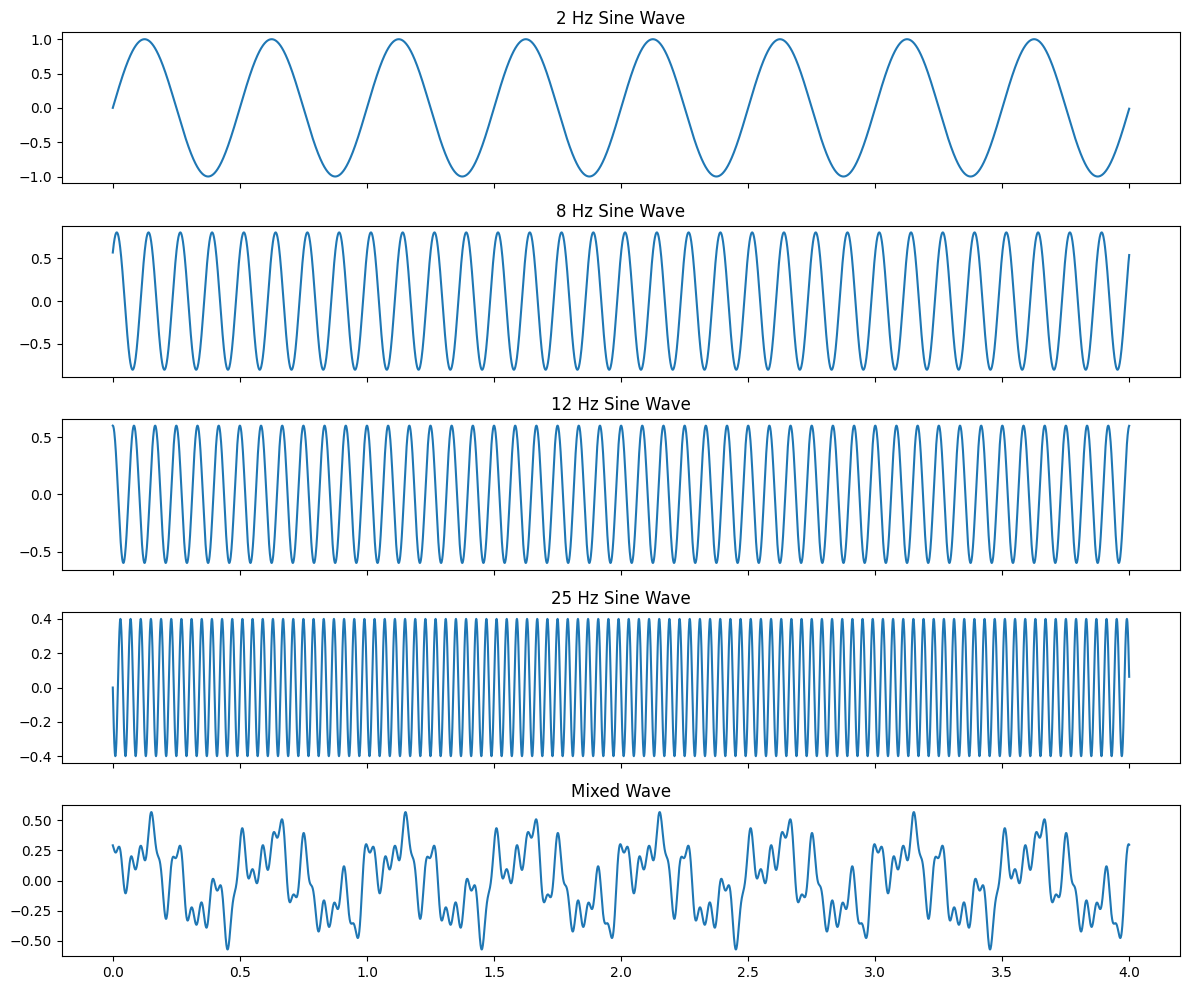

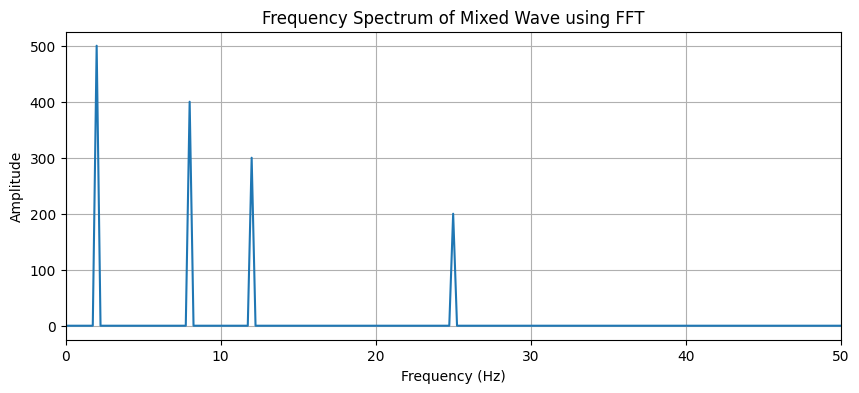

In [10]:
import numpy as np
import matplotlib.pyplot as plt

frequencies = [2, 8, 12, 25]
amplitudes = [1, 0.8, 0.6, 0.4]
phases = [0, np.pi/4, np.pi/2, np.pi]
duration = 4
sampling_rate = 1000
t = np.arange(0, duration, 1 / sampling_rate)

sine_waves = [a * np.sin(2 * np.pi * f * t + p) for f, a, p in zip(frequencies, amplitudes, phases)]
mixed_wave = np.mean(sine_waves, axis=0)

fig, axs = plt.subplots(5, 1, figsize=(12, 10), sharex=True)
for i, wave in enumerate(sine_waves):
    axs[i].plot(t, wave)
    axs[i].set_title(f"{frequencies[i]} Hz Sine Wave")

axs[4].plot(t, mixed_wave)
axs[4].set_title("Mixed Wave")
plt.tight_layout()
plt.show()

fft_vals = np.fft.rfft(mixed_wave)
fft_freqs = np.fft.rfftfreq(len(t), d=1/sampling_rate)
power_spectrum = np.abs(fft_vals)

plt.figure(figsize=(10, 4))
plt.plot(fft_freqs, power_spectrum)
plt.title("Frequency Spectrum of Mixed Wave using FFT")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.xlim(0, 50)
plt.show()


## Question 3


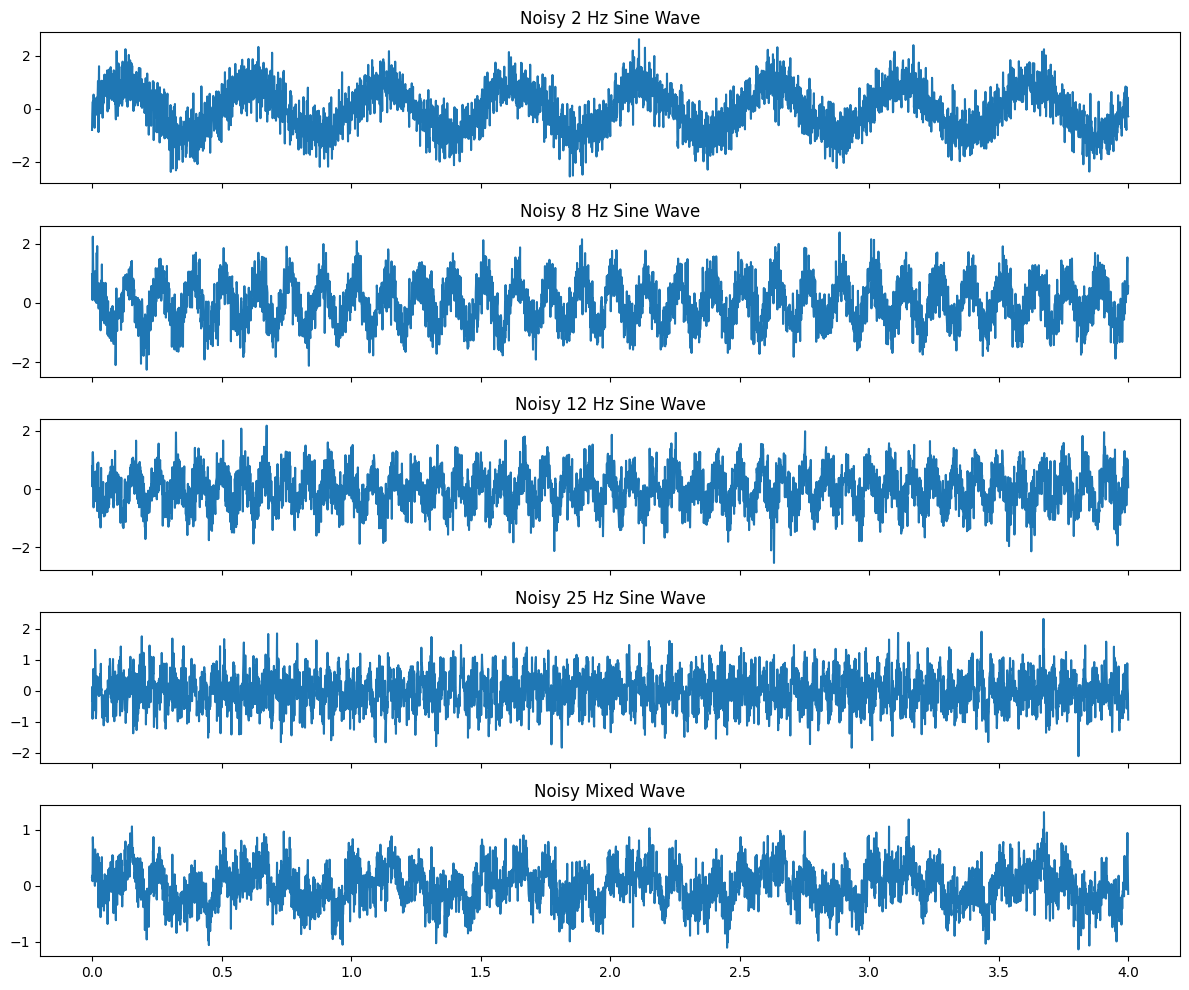

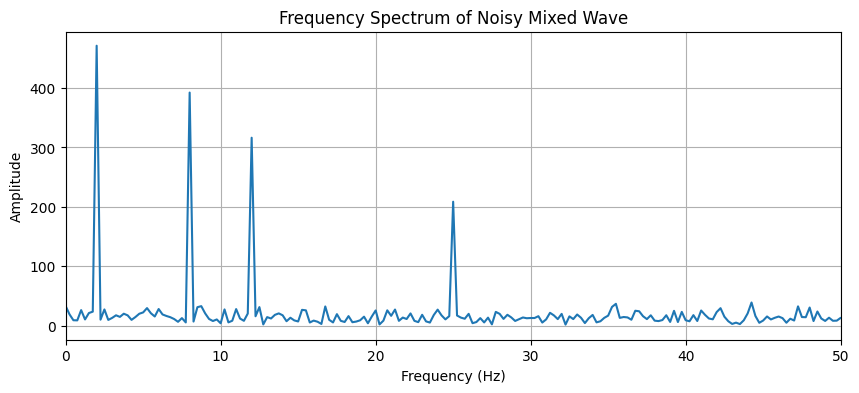

In [11]:
noisy_waves = [wave + np.random.normal(0, 0.5, size=t.shape) for wave in sine_waves]
noisy_mixed_wave = np.mean(noisy_waves, axis=0)

fig, axs = plt.subplots(5, 1, figsize=(12, 10), sharex=True)
for i, wave in enumerate(noisy_waves):
    axs[i].plot(t, wave)
    axs[i].set_title(f"Noisy {frequencies[i]} Hz Sine Wave")

axs[4].plot(t, noisy_mixed_wave)
axs[4].set_title("Noisy Mixed Wave")
plt.tight_layout()
plt.show()

fft_vals_noisy = np.fft.rfft(noisy_mixed_wave)
fft_freqs_noisy = np.fft.rfftfreq(len(t), d=1/sampling_rate)
power_spectrum_noisy = np.abs(fft_vals_noisy)

plt.figure(figsize=(10, 4))
plt.plot(fft_freqs_noisy, power_spectrum_noisy)
plt.title("Frequency Spectrum of Noisy Mixed Wave")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.xlim(0, 50)
plt.show()
